In [1]:
from spacecraft import *
import numpy as np
import jax
import jax.numpy as jnp
from known_spacecraft import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import IntProgress
from IPython.display import display
import time

In [2]:
sc1 = Spacecraft(8400, 0.5, 5.16*np.pi/180, 125.08*np.pi/180, 318.15*np.pi/180, 15*np.pi/180)

mu_prior = np.array([8400, 0.5, 5.16*np.pi/180, 125.08*np.pi/180, 318.15*np.pi/180, 30*np.pi/180, \
                    8600, 0.4, 4*np.pi/180, 140*np.pi/180, 300*np.pi/180, 20*np.pi/180])
confidence_1 = np.array([10, 0.05, 1*np.pi/180, 1*np.pi/180, 1*np.pi/180, 1*np.pi/180])
confidence_2 = np.array([200, 0.2, 10*np.pi/180, 10*np.pi/180, 10*np.pi/180, 10*np.pi/180])
Sigma_prior = np.diag(np.concatenate((confidence_1, confidence_2)))

sc2 = KnownSpacecraft(8400, 0.5, 5.16*np.pi/180, 125.08*np.pi/180, 318.15*np.pi/180, 30*np.pi/180, [], [sc1], \
                     mu_prior, Sigma_prior)

In [3]:
t = np.linspace(0, np.round(sc2.T*2), int(np.round(sc2.T*2))+1)
f = IntProgress(min=0, max=t.size) # instantiate the bar
print("Filter Progress: ")
display(f) # display the bar

for i in range(t.size-1):
    sc2.run_timestep(t[i])
    f.value += 1

Optimization Progress: 


IntProgress(value=0, max=15325)

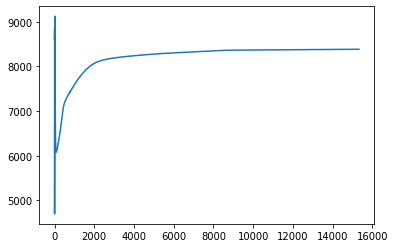

In [4]:
mu = np.array(sc2.mu_history).T
plt.plot(t, mu[6,:])

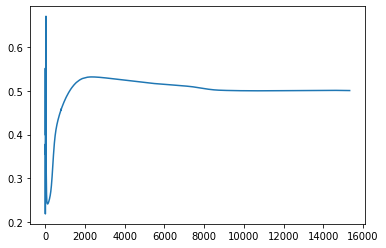

In [5]:
plt.plot(t, mu[7,:])

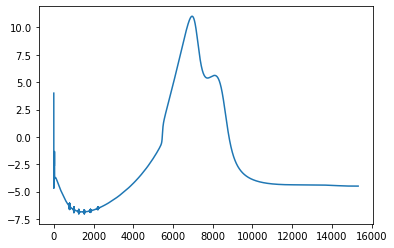

In [6]:
plt.plot(t, mu[8,:]*180/np.pi)

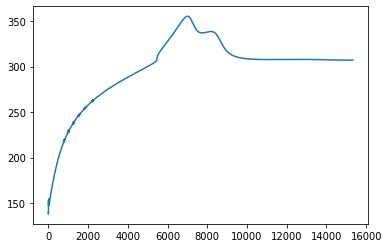

In [7]:
plt.plot(t, mu[9,:]*180/np.pi)

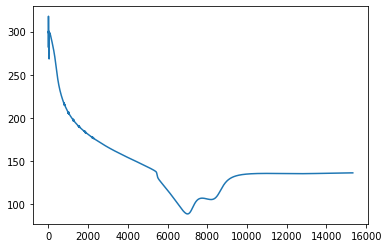

In [8]:
plt.plot(t, mu[10,:]*180/np.pi)

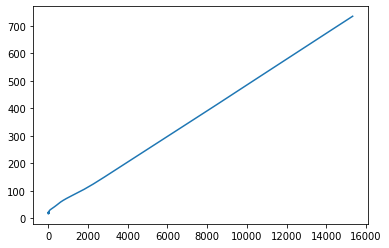

In [9]:
plt.plot(t, mu[11,:]*180/np.pi)